## 新一轮空值填充

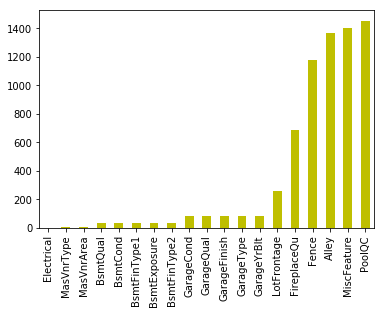

In [81]:
x=train.isnull().sum()
x[x>0].sort_values().plot.bar(color='y')

### LotFrontage的填充

思路1:去不同的Neighborhood的均值和中位数

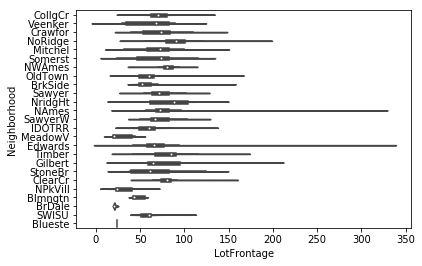

In [82]:
sns.violinplot(train['LotFrontage'],train['Neighborhood'])

In [83]:
neighborhood_group=train.groupby('Neighborhood')
lot_medians=neighborhood_group['LotFrontage'].median()
lot_mean=neighborhood_group['LotFrontage'].mean()

In [84]:
lot_mean

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [85]:
train[train['LotFrontage'].isnull()]['Neighborhood']

7        NWAmes
12       Sawyer
14        NAmes
16        NAmes
24       Sawyer
31       Sawyer
42      SawyerW
43      CollgCr
50      Gilbert
64      CollgCr
66        NAmes
76        NAmes
84      Gilbert
95      Gilbert
100      NWAmes
104      IDOTRR
111     Gilbert
113     Crawfor
116      Sawyer
120     ClearCr
126     NPkVill
131     Gilbert
133      Timber
136       NAmes
147     Gilbert
149     BrkSide
152      NWAmes
153     ClearCr
160     Veenker
166     ClearCr
         ...   
1300    Gilbert
1301    Crawfor
1309    SawyerW
1312    NoRidge
1318    CollgCr
1321    BrkSide
1342    CollgCr
1346     NWAmes
1348    SawyerW
1354    CollgCr
1356      NAmes
1357      NAmes
1358    Somerst
1362      NAmes
1365    Somerst
1368    CollgCr
1373    NoRidge
1381      NAmes
1383     Sawyer
1396     Timber
1407    Mitchel
1417    NoRidge
1419    Crawfor
1423    Edwards
1424      NAmes
1429     NWAmes
1431    NPkVill
1441    CollgCr
1443    BrkSide
1446    Mitchel
Name: Neighborhood, Leng

### 思路二:通过LotArea进行填充

In [86]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180816

In [87]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939364

In [88]:
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [89]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


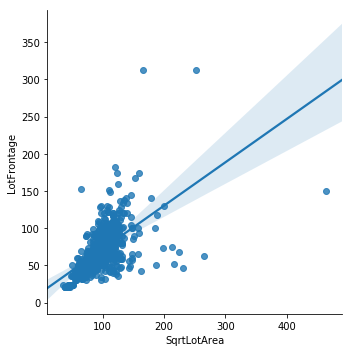

In [90]:
sns.lmplot('SqrtLotArea','LotFrontage',data=train)

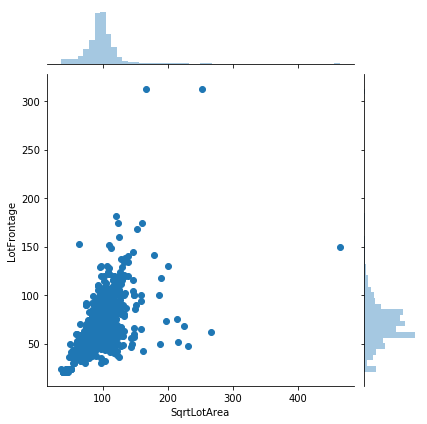

In [91]:
sns.jointplot('SqrtLotArea','LotFrontage',data=train)

In [92]:
filter=train['LotFrontage'].isnull()

In [93]:
train.LotFrontage[filter]=0.6*train.SqrtLotArea[filter]

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
filter=train['LotFrontage'].isnull()
filter.sum()

0

在图像分类的过程中，比如说猫狗分类，我们分类的交叉熵可以定义成：

H(p,q)=-p_cat * log(q_cat)-p_dog * log(q_dog)

一张图片上面画了一只猫：

p_cat=1

p_dog=0

如果我的预测期：

q_cat=0.2

q_dog=0.8

H(p,q)=-1 * log(0.2)-0 * log(0.8)

=-1*log(0.2)=-log(0.2)=log(5)

对于分类模型的交叉熵=-log(q_label)-->分类的Loss函数

对于一张图片上画了一只猫的真实的熵本身是多少？

H(p,q)-H(p)=D(p||q)



## MasVnrType和MasVnrArea的填充

In [95]:
x=train.isnull().sum()
x[x>0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [96]:
import matplotlib.pyplot as plt

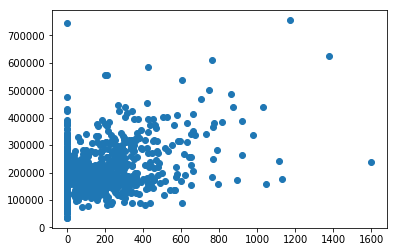

In [97]:
plt.scatter(train['MasVnrArea'],train['SalePrice'])

In [98]:
import seaborn as sns

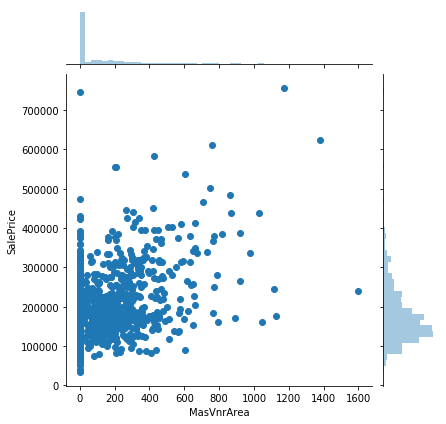

In [99]:
sns.jointplot(train['MasVnrArea'],train['SalePrice'])

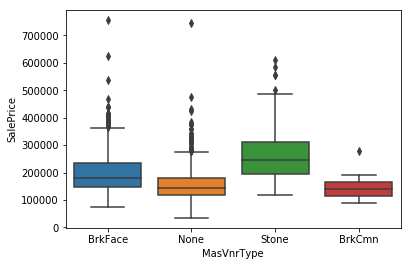

In [100]:
sns.boxplot('MasVnrType','SalePrice',data=train)

In [101]:
train.groupby(['MasVnrType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128


In [102]:
train[train.MasVnrType=='None'][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


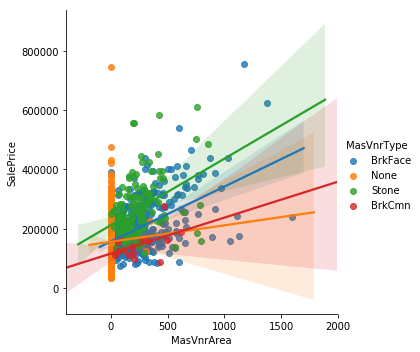

In [103]:
sns.lmplot('MasVnrArea','SalePrice',hue='MasVnrType',data=train)

In [104]:
filter=train['MasVnrArea'].isnull()

In [105]:
train.MasVnrArea[filter]=0.0

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
filter=train['MasVnrType'].isnull()
train.MasVnrType[filter]='None'

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


后续在EDA的特征工程中，可以使用如下填充办法：

1.分类进行预测MasVnrType，使用回归来回归MasVnrArea


In [107]:
def getnullcount():
    x=train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


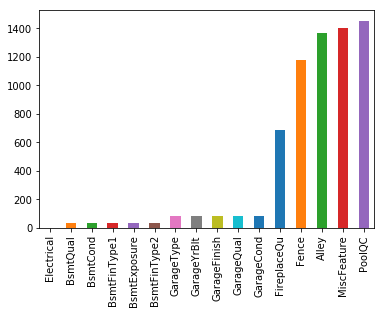

In [108]:
getnullcount()

### 3. Electrical的填充

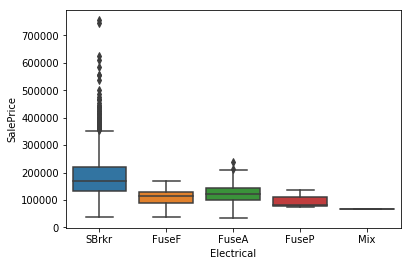

In [109]:
sns.boxplot('Electrical','SalePrice',data=train)

In [110]:
train.groupby(['Electrical']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,12,94,94,94,...,0,23,2,94,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,4,27,27,27,...,0,2,0,27,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,0,0,0,3,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,73,1334,1334,1334,...,7,256,52,1334,1334,1334,1334,1334,1334,1334


In [111]:
filter=train['Electrical'].isnull()
train['Electrical'][filter]='SBrkr'

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


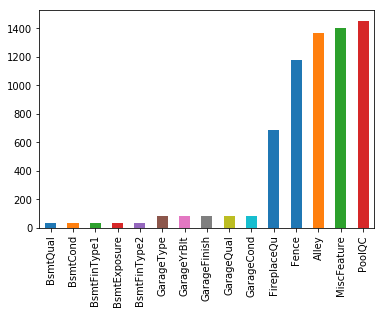

In [112]:
getnullcount()

### Alley填充

EDA后半段考虑删掉该列

In [113]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

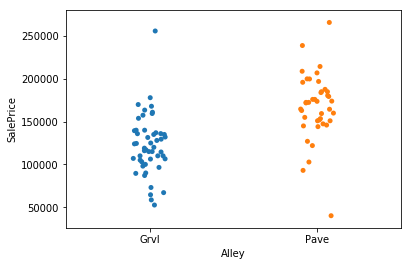

In [114]:
sns.stripplot(x=train['Alley'],y=train['SalePrice'],jitter=True)

In [115]:
train['Alley']=train['Alley'].fillna('None')

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


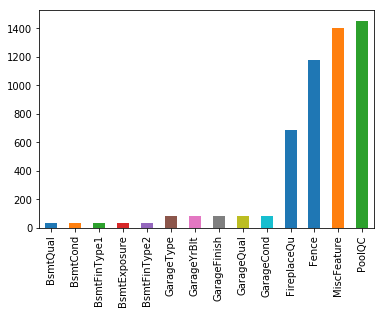

In [116]:
getnullcount()

### BaseMent群填充

TotalBsmt是一个完整的关于Basement的列，可以拿出来进行与SalePrice相关性分析

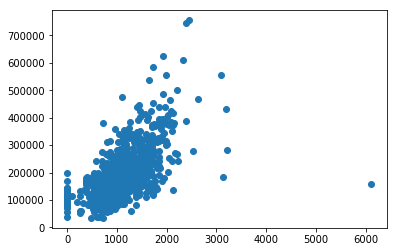

In [117]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])

In [118]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

In [119]:
print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN           0   
39        NaN      NaN          NaN          NaN          NaN           0   
90        NaN      NaN          NaN          NaN          NaN           0   
102       NaN      NaN          NaN          NaN          NaN           0   
156       NaN      NaN          NaN          NaN          NaN           0   
182       NaN      NaN          NaN          NaN          NaN           0   
259       NaN      NaN          NaN          NaN          NaN           0   
342       NaN      NaN          NaN          NaN          NaN           0   
362       NaN      NaN          NaN          NaN          NaN           0   
371       NaN      NaN          NaN          NaN          NaN           0   
392       NaN      NaN          NaN          NaN          NaN           0   
520       NaN      NaN          NaN          NaN          NaN           0   

In [120]:
train[train.BsmtCond=='NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea


In [121]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna('None')

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


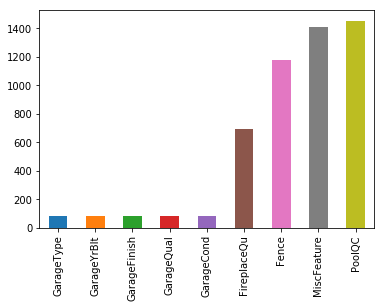

In [122]:
getnullcount()

### FirePlace填充

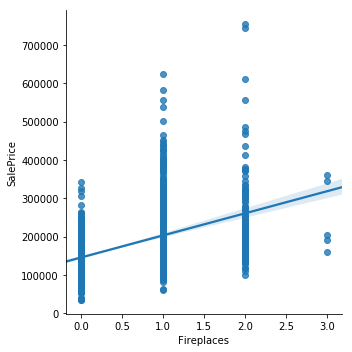

In [123]:
sns.lmplot('Fireplaces','SalePrice',data=train)

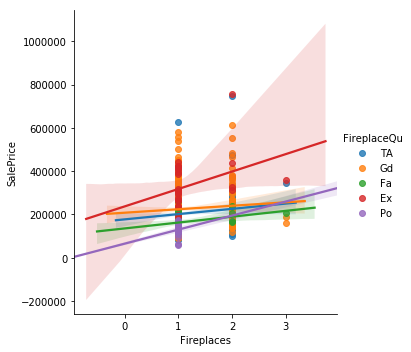

In [124]:
sns.lmplot('Fireplaces','SalePrice',data=train,hue='FireplaceQu')

In [125]:
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


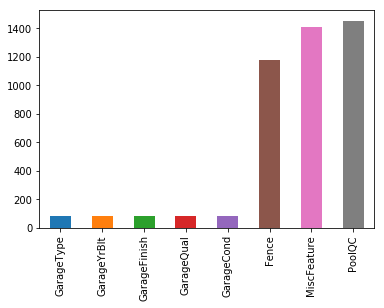

In [126]:
getnullcount()

### Garage列群填充

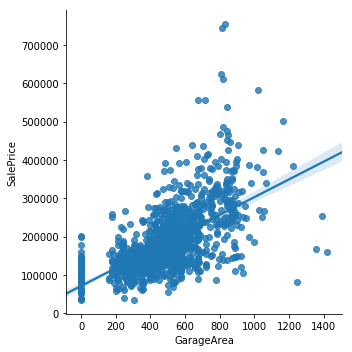

In [127]:
sns.lmplot('GarageArea','SalePrice',data=train)

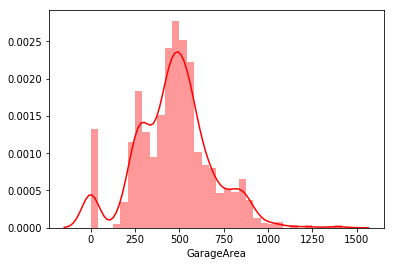

In [128]:
sns.distplot(train['GarageArea'],color='r',kde=True)

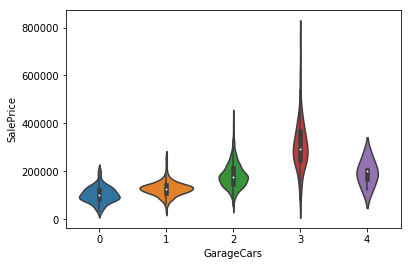

In [129]:
sns.violinplot(train['GarageCars'],train['SalePrice'])

In [130]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [131]:
train[garage_cols][train['GarageType'].isnull()]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [132]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col]=train[col].fillna('None')
    else:
        train[col]=train[col].fillna(0)

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


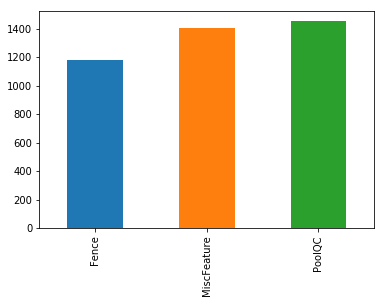

In [133]:
getnullcount()

### PoolQC填充

In [134]:
train.filter(like='Pool',axis=1)

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


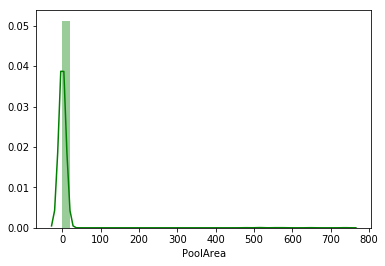

In [135]:
sns.distplot(train['PoolArea'],color='g',kde=True)

In [136]:
train.PoolQC=train.PoolQC.fillna('None')

Fence          1179
MiscFeature    1406
dtype: int64


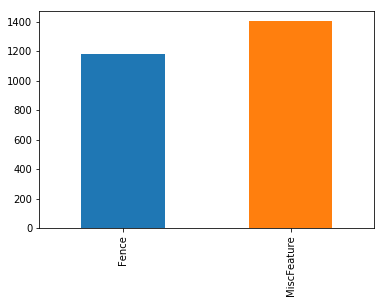

In [137]:
getnullcount()

### Fence填充

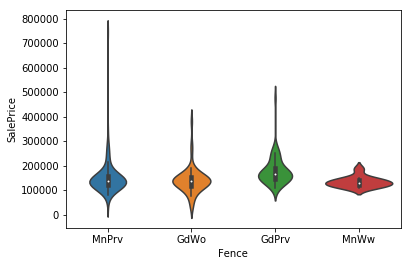

In [138]:
sns.violinplot(train['Fence'],train['SalePrice'])

因为总共有5个类型，然而可以统计出来的类型一共只有4类，因此，可以断定最后一个类NA用空值代替了 

In [139]:
train['Fence']=train['Fence'].fillna('None')

回看填充后的数据与SalePrice的关系

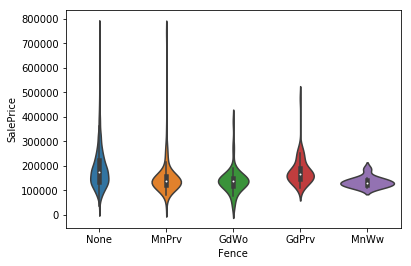

In [140]:
sns.violinplot(train['Fence'],train['SalePrice'])

### MiscFeature 填充

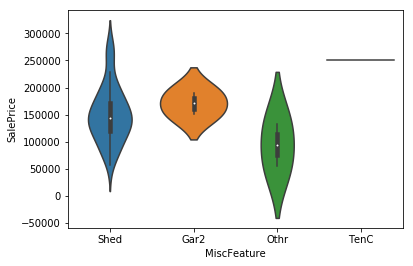

In [141]:
sns.violinplot(train['MiscFeature'],train['SalePrice'])

因为MiscFeature本来有5类，然而只统计出4类，因此可以断定第五类NA其实是空值代表的

In [142]:
train['MiscFeature']=train['MiscFeature'].fillna('None')

In [143]:
#getnullcount()

In [1]:
train.to_csv('./data/train_1.csv')

NameError: name 'train' is not defined

## 机器学习部分

需要考虑各种单独的模型的各自表现后，筛选出表现较好的模型，并进行集成学习

1.线性回归类模型

    1.1朴素线性回归
    
    1.2基于L1的线性回归
    
    1.3基于L2的线性回归
    
    1.4ElasticNet
    
2.树回归-CART

    2.1CART
    
    2.2RF
    
    2.3AdaBoost
    
    2.4GBDT--XGBoost--lightGBM
    
3.SVM类型

    3.1SVR
    
* 4.神经网络

    4.1FC神经网络
    

5.集成学习

    5.1 Stacking Ensemble

### 数据集的准备

In [11]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

In [12]:
train=pd.read_csv('./data/train_1.csv')

In [13]:
y=train['SalePrice']

In [14]:
train1=train.drop(['Id','SalePrice'],axis=1)

In [15]:
X=pd.get_dummies(train1).reset_index(drop=True)

In [16]:
X['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
        ... 
1430    1430
1431    1431
1432    1432
1433    1433
1434    1434
1435    1435
1436    1436
1437    1437
1438    1438
1439    1439
1440    1440
1441    1441
1442    1442
1443    1443
1444    1444
1445    1445
1446    1446
1447    1447
1448    1448
1449    1449
1450    1450
1451    1451
1452    1452
1453    1453
1454    1454
1455    1455
1456    1456
1457    1457
1458    1458
1459    1459
Name: Unnamed: 0, Length: 1460, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [18]:
#X_train

### 基础线性回归

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
lm=LinearRegression()

In [21]:
p=lm.fit(X_train,y_train)

In [22]:
pred=lm.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))

0.1261836114097341

In [24]:
np.sqrt(mean_squared_error(y_test,pred))

24966.337410199623

In [25]:
def benchmark(model):
    pred=model.predict(X_test)
    logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return logrmse

In [26]:
benchmark(lm)

0.1261836114097341

#### 预处理 Preprocessing

In [27]:
from sklearn.pipeline import make_pipeline

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
lm_model=make_pipeline(RobustScaler(),LinearRegression())

In [30]:
lm_model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [31]:
benchmark(lm_model)

0.12618361141005166

### RidgeRegression

In [32]:
from sklearn.linear_model import Ridge

#### 朴素的Ridge回归

In [33]:
ridge_model=Ridge(alpha=0.1)

In [34]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
benchmark(ridge_model)

0.12655652003733112

#### 带有RobustScaler的回归

In [36]:
ridge_model_pipe=make_pipeline(RobustScaler(),Ridge(alpha=0.1))

In [37]:
ridge_model_pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [38]:
benchmark(ridge_model_pipe)

0.12655937132758488

#### 带有CV的回归

In [39]:
from sklearn.model_selection import KFold

In [40]:
kfolds=KFold(n_splits=10,shuffle=True,random_state=123)

In [41]:
from sklearn.linear_model import RidgeCV

In [42]:
r_alphas=[0.01,0.1,1,3,5,7,10,100]

In [43]:
ridge_model_cv=make_pipeline(RobustScaler(),RidgeCV(alphas=r_alphas,cv=kfolds))

In [44]:
ridge_model_cv.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 1.e+02]),
    cv=KFold(n_splits=10, random_state=123, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [45]:
benchmark(ridge_model_cv)

0.12438552197375935

In [46]:
def benchmark1(model,testset,label):
    pred=model.predict(testset)
    if pred[pred<0].shape[0]>0:
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(label,pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label),np.log(pred)))

    print('RMSE:',rmse)
    print('LRMSE:',lrmse)
    return lrmse

In [47]:
benchmark1(ridge_model_cv,X_test,y_test)

RMSE: 26917.45795604978
LRMSE: 0.12438552197375935


0.12438552197375935

In [124]:
r_alphas=[.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

In [125]:
def ridge_train_test(alpha):
    m=make_pipeline(RobustScaler(),RidgeCV(alphas=[alpha],cv=kfolds))
    m.fit(X_train,y_train)
    return benchmark1(m,X_test,y_test)

In [126]:
scores=[]
for k in r_alphas:
    scores.append(ridge_train_test(k))

RMSE: 24966.40302392312
LRMSE: 0.12618468133698318
RMSE: 24966.534049536123
LRMSE: 0.12618679131133684
RMSE: 24966.664817148365
LRMSE: 0.12618886217759312
RMSE: 24966.79533986033
LRMSE: 0.12619089480001697
RMSE: 24966.925630897116
LRMSE: 0.1261928900226872
RMSE: 24972.815984083718
LRMSE: 0.1262550555166803
RMSE: 25007.893440471486
LRMSE: 0.1263642662373888
RMSE: 25070.76049543461
LRMSE: 0.12655937132758488
RMSE: 25331.38136595073
LRMSE: 0.12765621823283263
RMSE: 25785.940190598383
LRMSE: 0.13005002719016245
RMSE: 26033.30915666194
LRMSE: 0.1316456977205744
RMSE: 26021.284156113044
LRMSE: 0.13150831954283543
RMSE: 25912.005959014103
LRMSE: 0.13040651460413316
RMSE: 25851.24719169618
LRMSE: 0.12942505856751282
RMSE: 25837.65029685239
LRMSE: 0.12863398298618703
RMSE: 25894.215804064737
LRMSE: 0.12743758025937693
RMSE: 26148.05400132307
LRMSE: 0.12591254743971528
RMSE: 26299.322251440408
LRMSE: 0.1254110332796977
RMSE: 26454.855374654253
LRMSE: 0.12502851180211785
RMSE: 26610.91089376119
L

In [127]:
import matplotlib.pyplot as plt

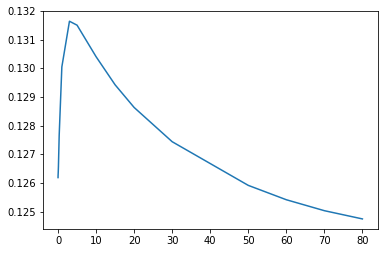

In [128]:
plt.plot(r_alphas,scores)

#### RidgeCV自动筛选参数

In [135]:
r_alphas2=np.logspace(-10,2.8,150)

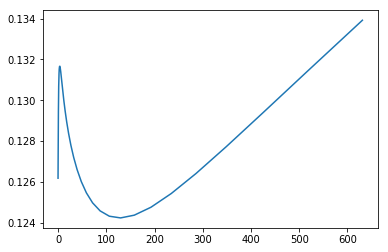

In [138]:
plt.plot(r_alphas2,scores)

可以使用自动优化筛选出最优的alpha

In [140]:
benchmark1(ridge_model2,X_test,y_test)

RMSE: 26002.568196719007
LRMSE: 0.12660125085842427


0.12660125085842427

In [141]:
#最好的alpha
ridge_model2.steps[1][1].alpha_

39.56538865832277

### Lasso Regression

In [142]:
from sklearn.linear_model import LassoCV

In [143]:
l_alphas=np.logspace(-10,2.8,150)

In [146]:
def lasso_train_test(alpha):
    lasso_model=make_pipeline(RobustScaler(),LassoCV(alphas=[alpha],cv=kfolds))
    lasso_model.fit(X_train,y_train)
    lrmse=benchmark1(lasso_model,X_test,y_test)
    return lrmse

In [158]:
import warnings 
warnings.filterwarnings('ignore')

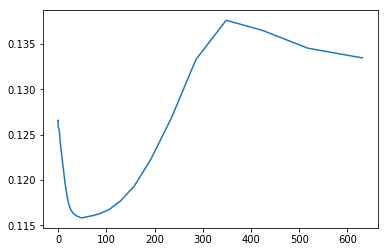

In [148]:
plt.plot(l_alphas,scores)

In [149]:
lasso_train_test(50)

RMSE: 24605.58985079599
LRMSE: 0.11581401793926524


0.11581401793926524

In [159]:
benchmark1(lasso_model2,X_test,y_test)

RMSE: 25439.746569821087
LRMSE: 0.12228974592716889


0.12228974592716889

In [160]:
lasso_model2.steps[1][1].alpha_

192.5589718453296

In [163]:
#lasso_model2.steps[1][1].alpha_

### ElasticNet

In [164]:
from sklearn.linear_model import ElasticNetCV

In [166]:
e_l1ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1]

In [167]:
e_alphas=l_alphas

In [169]:
def elastic_train_test(alpha,l1ratio):
    e_model=make_pipeline(RobustScaler(),ElasticNetCV(alphas=[alpha],l1_ratio=[l1ratio]))
    e_model.fit(X_train,y_train)
    lrmse=benchmark1(e_model,X_test,y_test)
    return lrmse

In [170]:
elastic_train_test(50,0.5)

RMSE: 64802.77270461465
LRMSE: 0.3056722083417286


0.3056722083417286

In [171]:
elastic_model3=make_pipeline(RobustScaler(),ElasticNetCV(alphas=e_alphas,l1_ratio=e_l1ratio)).fit(X_train,y_train)

In [172]:
benchmark1(elastic_model3,X_test,y_test)

RMSE: 25439.746569821087
LRMSE: 0.12228974592716889


0.12228974592716889

In [174]:
elastic_model3.steps[1][1].alpha_

192.5589718453296

In [176]:
elastic_model3.steps[1][1].l1_ratio_

1.0